In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stsynphot as STS

from os.path import expanduser
from wlenet import config

In [2]:
save_figures = True

In [3]:
optical = ['f435w', 'f475w', 'f606w', 'f625w', 'f775w', 'f814w', 'f850lp']

In [4]:
wave_lengths = np.linspace(3000, 11000, 500)

/cs/phd/springer/.local/lib/python3.5/site-packages/stsynphot/stio.py:238: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(data[key].dtype, val):
/cs/phd/springer/.local/lib/python3.5/site-packages/stsynphot/stio.py:238: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if not np.issubdtype(data[key].dtype, val):


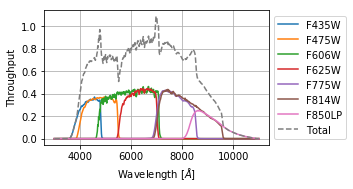

In [5]:
plt.figure(figsize=[5,2.75])
total = np.zeros(wave_lengths.shape)
for i, band_name in enumerate(optical):
    bp = STS.band('acs,wfc1,' + band_name)
    curr = np.array(bp(wave_lengths))
    total += curr
    plt.plot(wave_lengths, curr, label=band_name.upper())
plt.plot(wave_lengths, total, '--', label='Total')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid('on')
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Throughput')
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(right=0.75)

if save_figures:
    fig_path = expanduser(config['figure_path'] + '/observations/clash_throughputs.pdf')
    plt.savefig(fig_path)